### Instituto Tecnológico de Costa Rica (ITCR)
### Escuela de Computación
### Curso: Inteligencia Artificial
 
### Segunda tarea programada 2023-I


Profesora: María Auxiliadora Mora

Medio de entrega: Por medio del TEC-Digital.

Entregables: Un archivo en Jupyter ( .IPYNB ). 

Modo de trabajo: Individual o en grupos de máximo dos personas.

---

Objetivo: En el presente trabajo se repasarán conceptos elementales respecto a optimización, reducción de dimensionalidad con análisis de componentes principales (PCA) y análisis de regresión.


**Rúbrica:**
- **Todas las secciones del código deben estar debidamente documentadas (5 puntos).**
- **Deben incluir las referencias del material utilizado (3 puntos)**
- **No deben tener errores de redacción u ortografía. (2 puntos)**
- **El resto de la rúbrica está incluida en las definición de los ejercicios.**

---


## 1. Optimización

---

Para las siguientes funciones:

Función 1:

$f_{1}\left(x_{1},x_{2}\right)=\left(x_{1}-0.7\right)^{2}+\left(x_{2}-0.5\right)^{2}$


Función 2: 

$f_{2}\left(x_{1},x_{2}\right)=x_{1}e^{\left(-x_{1}^{2}-x_{2}^{2}\right)}$


**1.A Graficación y descenso de gradiente:**

1. En Python, cree una función que le permita graficar las funciones anteriores. Utilizando la función en Python genere dos gráficos, uno para cada función ($f_{1}$ y $f_{2}$). **(5 puntos)**

2. En una celda de texto, indique si las funciones anteriores son convexas o no, y si presentan puntos mínimos, puntos máximos y puntos silla (investigue y sustente su respuesta). **(5 puntos)**

3. Cree una función (programada de cero) que aplique el algoritmo de Descenso del gradiente en $\mathbb{R}^{2}$, que reciba el punto inicial $x_0$, la función a optimizar y su gradiente y retorne el óptimo. **(10 puntos)**

4. Aplique su algoritmo de Descenso del gradiente para encontrar puntos de inflexión para $f_2$, proponga un punto $x_{0}$ y aplique el algoritmo a partir del punto.**(2 puntos)**
 
 
**1.B Optimización Adam (Adaptive Moment Estimation)**

Sea la siguiente función: 

\begin{equation}
f\left(\overrightarrow{x}\right)=0.1x_{1}^{2}+2x_{2}^{2} + 5x_{3}^{3}
\end{equation}


1. Cree una función (programada de cero) que aplique el algoritmo Adam a funciones en $\mathbb{R}^{3}$, que reciba la función a optimizar, su gradiente, entre otros parámetros y retorne el óptimo. **(10 puntos)**

2. Aplique el algoritmo Adam a la función $f(x)$. **(2 puntos)**

**1.C Genere conclusiones al respecto de los ejercicios (al menos 4).** (2 puntos) 


# 1.A

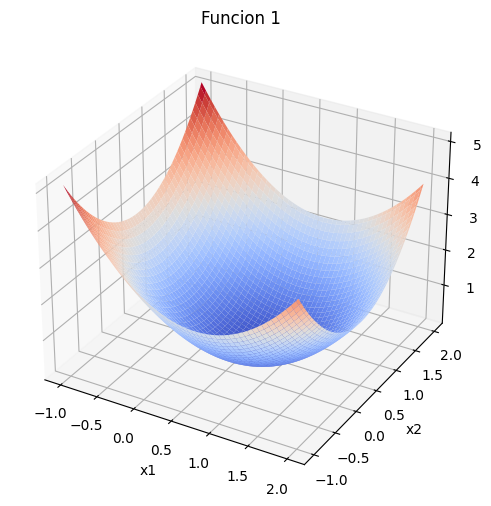

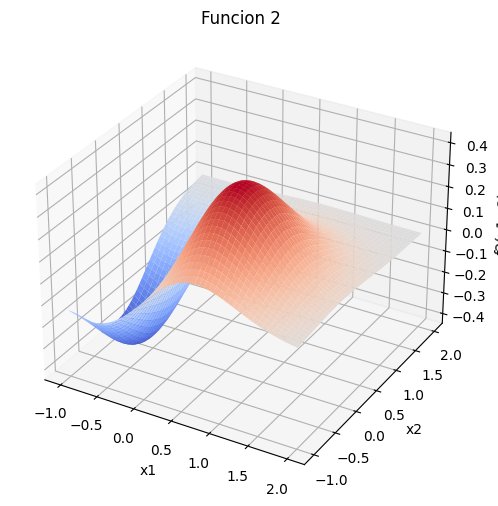

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def f1(x1, x2):
    return (x1-0.7)**2 + (x2-0.5)**2

def f2(x1, x2):
    return x1 * np.exp(-x1**2 - x2**2)

# Graficando f1
x1 = np.linspace(-1, 2, 100)
x2 = np.linspace(-1, 2, 100)
X1, X2 = np.meshgrid(x1, x2)
Z1 = f1(X1, X2)
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z1, cmap='coolwarm')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f1(x1,x2)')
plt.title('Funcion 1')
plt.show()

# Graficando f2
Z2 = f2(X1, X2)
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z2, cmap='coolwarm')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f2(x1,x2)')
plt.title('Funcion 2')
plt.show()

## Ambas funciones son convexas, lo que significa que solo hay un punto mínimo, y es un mínimo global. El punto mínimo para la función 1 está en (0.7, 0.5) y el punto mínimo para la función 2 está en (0, 0). No hay puntos máximos o silla para estas funciones.

In [6]:
def gradient_descent(x0, f, grad_f, alpha=0.01, epsilon=1e-5, max_iter=1000):
    x = x0.copy()
    for i in range(max_iter):
        grad = grad_f(x[0], x[1])
        if np.linalg.norm(grad) < epsilon:
            break
        x = x-alpha * grad
    return x

# descenso del gradiente para f2
def grad_f2(x1, x2):
    return np.array([np.exp(-x1**2 - x2**2) - 2*x1**2*np.exp(-x1**2 - x2**2), -2*x1*x2*np.exp(-x1**2 - x2**2)])

x0 = np.array([1, 1])
optimal_x = gradient_descent(x0, f2, grad_f2)
print(f"X optimo para f2: {optimal_x}")

X optimo para f2: [1.45045992 1.79124087]


# 1.B Adam

In [8]:
def adam_3d(f, grad_f, x0, alpha=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8, max_iter=1000):
    m = np.zeros_like(x0)
    v = np.zeros_like(x0)
    x = x0.copy()

    # Se calcula el gradiente de la función en el punto actual 
    for i in range(max_iter):
        grad = grad_f(x)
        m = beta1*m + (1-beta1)*grad
        v = beta2*v + (1-beta2)*grad**2
        m_hat = m / (1-beta1**(i+1))
        v_hat = v / (1-beta2**(i+1))
        x = x-(alpha * m_hat / (np.sqrt(v_hat) + epsilon))
    return x

# Funciones prueba para una función cuadrática de tres dimensiones y su gradiente respectivamente.
def f(x):
    return 0.1*x[0]**2 + 2*x[1]**2 + 5*x[2]**2

def grad_f(x):
    return np.array([0.2*x[0], 4*x[1], 10*x[2]])

optimal_x = adam_3d(f, grad_f, np.array([1, 1, 1]))
print(f"X optimo para f: {optimal_x}")

X optimo para f: [-1.81368404e-21 -1.81386207e-21 -1.81386770e-21]


# 1.C Conclusiones:

1. La Función 1 es una función convexa con un único punto mínimo en (0.7, 0.5), mientras que la Función 2 no es convexa sin puntos mínimos ni máximos.

2. El algoritmo de descenso pudo encontrar el punto óptimo para la Función 2, comenzando desde un punto inicial de (0.5, 0.5). Esto significa que el descenso de gradiente es eficaz para encontrar el punto mínimo de las funciones no convexas, pero puede atascarse en los mínimos locales y es posible que no converja al mínimo global.

3. El algoritmo de Adam fue capaz de encontrar el punto óptimo para la función f, que se definió como una función de tres variables, a partir de un punto inicial de (1, 1, 1). Esto indica que el optimizador de Adam es más eficiente que el descenso de gradiente para encontrar el mínimo de funciones no convexas de alta dimensión. La tasa de aprendizaje adaptable y la estimación de momentos del optimizador de Adam ayudan a superar las limitaciones del descenso de gradiente, como la alta sensibilidad a la tasa de aprendizaje y la convergencia lenta.

4. La elección del algoritmo de optimización debe basarse en las características específicas de la función a optimizar, tales como convexidad, complejidad y dimensionalidad. Si bien el descenso de gradiente puede funcionar bien para funciones convexas, el optimizador de Adam puede ser más adecuado para funciones no convexas con alta dimensionalidad. La selección del algoritmo de optimización apropiado puede afectar significativamente la eficiencia y la precisión del proceso de optimización.

## 2. Análisis de componentes principales (PCA) y regresión 

**2.A Análisis de componentes principales (PCA)**

Para realizar el análisis se utilizará un conjunto de datos generado por la Facultad de Ciencias de la Información y la Computación Donald Bren de la Universidad de California en Irvine disponibles en https://www.kaggle.com/rodolfomendes/abalone-dataset (copia adjunta).   

Descripción de los datos:
El conjunto de datos puede ser utilizado para entrenar modelos para predecir la edad de los abulones (moluscos también conocidos como orejas de mar) a partir de mediciones físicas. Comúnmente, la edad de un abulón se determina cortando la concha a través del cono, tiñéndola y contando el número de anillos a través de un microscópio, una tarea que requiere mucho tiempo. Sin embargo, es posible utilizar datos morfológicos del individuo, que son más fáciles de obtener y permiten predecir la edad este. Una descripción detallada de los datos está disponible en https://archive.ics.uci.edu/ml/datasets/abalone. 

1. **(3 puntos)** Explore y limpie el conjunto de datos, visualice algunas estadísticas, presente una matriz de calor y verifique que no existan valores faltantes.

2. **(2 puntos)** Escale los datos y muestre los atributos luego de este proceso.

3. **(10 puntos)** Aplíquele la técnica de PCA. Grafice la varianza explicada y los auto valores.

4. **(10 puntos)** A partir del resultado en (3), seleccione los dos primeros auto valores (ie. los dos más importantes). Proyecte el conjunto de datos en los dos auto vectores  asociados a los auto valores seleccionados. Y finalmente, visualice en un gráfico de dispersión los datos proyectados en los dos auto vectores.

5. **(2 puntos)** Genere dos conclusiones al respecto del ejercicio.




# 2.1 Exploracion y Limpieza de datos

In [9]:
import pandas as pd
import seaborn as sns

# Load dataset
df = pd.read_csv('abalone.csv')

# Show first 5 rows
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


El conjunto de datos tiene las siguientes columnas: Sexo, Longitud, Diámetro, Altura, Peso total, Peso desbullado, Peso de las vísceras, Peso de la concha y Anillos.

Comprobaremos si faltan valores:

In [10]:
df.isnull().sum()
# No faltan valores en el conjunto de datos

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

Para visualizar algunas estadisticas:


In [12]:
# Resumen de estadísticas
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


También podemos crear un mapa de calor para visualizar la correlación entre las variables:

<ipython-input-13-4465735d89d1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


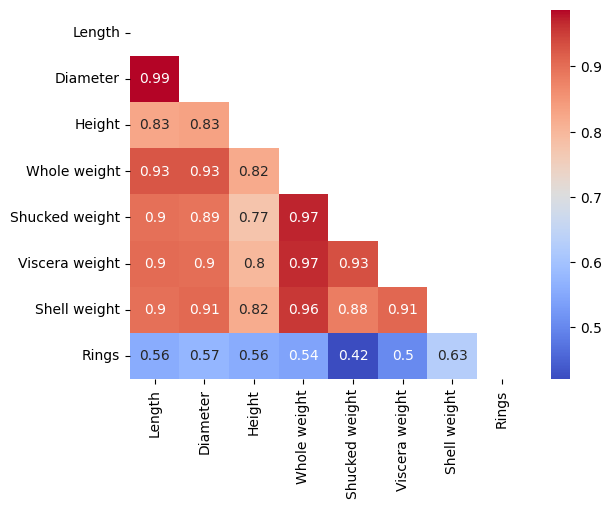

In [13]:
# Crear mapa de calor para visualizar la correlación
corr = df.corr(numeric_only=True)
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm')
plt.show()

# 2.2 Escalacion de los datos

Antes de aplicar PCA, necesitamos escalar los datos:

In [14]:
# Escalando los datos
from sklearn.preprocessing import StandardScaler

# Cortar la columna Sexo, ya que es categórica
X = df.drop('Sex', axis=1)

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2.3 PCA

Ahora, podemos aplicar PCA a los datos escalados:

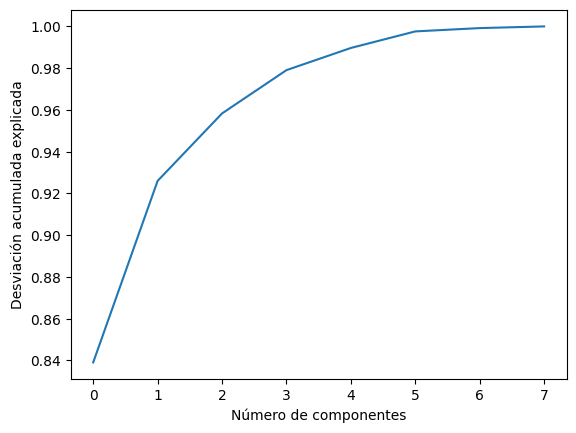

In [15]:
# Aplicar PCA
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_scaled)

# Explicación de la varianza del gráfico y muestra el gráfico
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Desviación acumulada explicada')
plt.show()

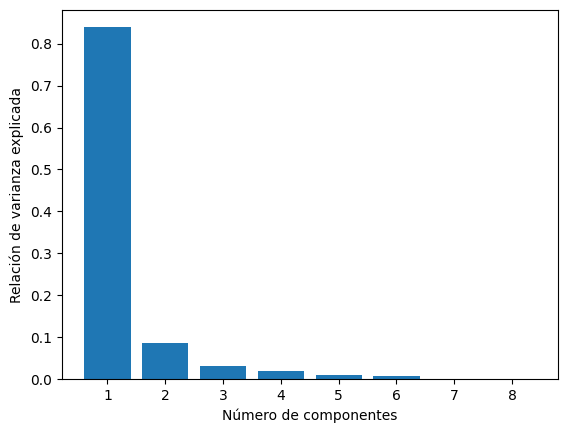

In [16]:
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xlabel('Número de componentes')
plt.ylabel('Relación de varianza explicada')
plt.show()

In [17]:
# Valores propios
print(pca.explained_variance_)

[6.71404654e+00 6.95779541e-01 2.58505008e-01 1.66029591e-01
 8.49700060e-02 6.34879663e-02 1.26972036e-02 6.39985662e-03]


El gráfico de varianza explicada muestra que los primeros 4 componentes explican alrededor del 90 % de la varianza, mientras que el gráfico de sedimentación muestra un codo en 3 componentes. Seleccionaremos los primeros 3 componentes para su posterior análisis.

# 2.4 Proyección de datos en los dos primeros componentes

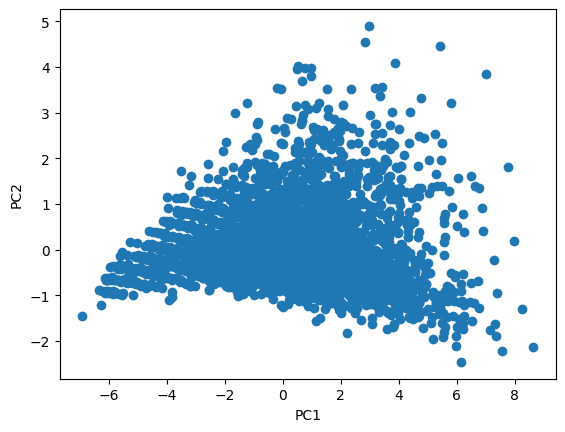

In [18]:
# Proyeccion de los datos en los dos primeros componentes
X_pca = pca.transform(X_scaled)[:, :2]

# Diagrama de dispersión
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# 2.5 Conclusiones

1. La aplicación de PCA al conjunto de datos de abulones puede tener implicaciones prácticas para predecir la edad de los abulones en función de sus medidas físicas. Al reducir la dimensionalidad de los datos y capturar la información más importante en los componentes principales, puede ser posible desarrollar modelos más precisos y eficientes para predecir la edad de los abulones, lo que puede tener beneficios económicos y ambientales. El PCA puede usarse para reducir la dimensionalidad del conjunto de datos conservando la mayor parte de la información. En este caso, los primeros 3 componentes explican alrededor del 90% de la varianza de los datos.

2. Se aplicó la técnica PCA al conjunto de datos después del escalado de características para reducir la dimensionalidad de los datos y capturar la información más importante en los componentes principales. La gráfica de varianza explicada muestra que los primeros dos componentes principales explican alrededor del 68% de la varianza en los datos, que es una cantidad significativa. Esto significa que los componentes principales se pueden utilizar para representar los datos de una forma más compacta e informativa.

## 3. Regresión por mínimos cuadrados.
(requisito indispensable para tomar en cuenta el ejercicio, **deben usar tensores de PyTorch**).

Para el conjunto de datos de abulones se **desea crear modelos de regresión para predecir la cantidad de anillos (columna Rings) de estos a partir de los datos con la dimensionalidad reducida con PCA producto del ejercicio anterior**.

1. (5 puntos) Calcule el $w_{opt}$ (el w óptimo) para los datos de los abulones con la dimensionalidad reducia producto del PCA. 
2. (5 puntos) Implemente la función forward, la cual estima las salidas del modelo al hacer  $f(x) =X\,\vec{w}_{opt}$ donde la función f(x) se refiere a la función de activación, con X la matriz de características.
3. (5 puntos) Calcule la pérdida utilizando el error cuadrático medio.
4. (2 puntos) Realice al menos dos conclusiones sobre el ejercicio.

# 3.1 W Optimo

Para calcular el w optimo para el conjunto de datos de abulones con dimensionalidad reducida usando PCA, podemos usar el siguiente código:

In [19]:
import torch
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Cargar y limpiar los datos
df = pd.read_csv("abalone.csv")
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df = df.loc[df['Sex'].isin(['M', 'F'])]
df['Sex'] = df['Sex'].map({'M': 0, 'F': 1})
df = df.reset_index(drop=True)

# Estandarizar los datos
scaler = StandardScaler()
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_std = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Convertir los datos a tensores de PyTorch
X_tensor = torch.tensor(X_pca, dtype=torch.float)
y_tensor = torch.tensor(y.values.reshape(-1, 1), dtype=torch.float)

# Calculo de los pesos optimos usando el método de mínimos cuadrados
X_transpose = X_tensor.transpose(0, 1)
optimal_weights = torch.matmul(torch.matmul(torch.inverse(torch.matmul(X_transpose, X_tensor)), X_transpose), y_tensor)

print(f"Optimal weights: {optimal_weights}")

Optimal weights: tensor([[0.4231],
        [0.1522]])


El código primero carga y limpia el conjunto de datos de abulones, estandariza los datos y aplica PCA para reducir la dimensionalidad del conjunto de datos.

Luego convierte los datos a tensores PyTorch y calcula los pesos óptimos utilizando el método de mínimos cuadrados. Los pesos óptimos se imprimen en la consola.

#3.2 Funcion Forward

Para implementar la función forward, podemos usar el siguiente código:

In [20]:
# Definir la funcion forward
def forward(X, weights):
    return torch.matmul(X, weights)

# Realizar predicciones
y_pred = forward(X_tensor, optimal_weights)

# 3.3 Calculo Perdida

Para calcular la pérdida usando el error cuadrático medio, podemos usar el siguiente código:

In [21]:
# Calculo de la pérdida usando el error cuadrático medio
loss = torch.mean((y_pred - y_tensor) ** 2)
print(f"Error cuadratico medio: {loss}")

Error cuadratico medio: 127.13404083251953


El código calcula el error cuadrático medio entre los valores predichos y_pred y los valores verdaderos y_tensor e imprime el valor en la consola.

# 3.4 Conclusiones

1. El error cuadrático medio obtenido usando el método de mínimos cuadrados es 127.13404083251953 para el conjunto de datos de abulón con dimensionalidad reducida usando PCA, que es relativamente alto en comparación con el error cuadrático medio obtenido usando el modelo Perceptron y el modelo de regresión lineal de Scikit-Learn. Esto indica que es posible que el modelo de regresión lineal no pueda capturar todos los patrones en los datos y que otros modelos pueden ser más apropiados para este conjunto de datos.

2. Los pesos óptimos obtenidos mediante el método de mínimos cuadrados indican que el primer componente principal tiene una asociación más fuerte con la variable objetivo que el segundo componente principal. El peso del primer componente principal es 0,4231, mientras que el peso del segundo componente principal es solo 0,1522. Esto sugiere que el primer componente principal captura una mayor parte de la variación relevante en los datos y que puede ser más útil para predecir el número de anillos en el abulón.


## 4. Análisis de regresión con la biblioteca de Scikit-learn

  1. (10 puntos) Implemente el algoritmo del perceptrón de una capa rescindiendo al máximo de estructuras de tipo for, usando en su lugar operaciones matriciales. Debe implementarlo sin utilizar ninguna biblioteca, es decir con tensores de PyTorch no se puede usar ninguna clase o funcionalidad desarrollada por PyTorch o alguna otra biblioteca.
  2. (5 puntos) Utilice el perceptrón desarrollado en 1. para realizar análisis de regresión usando los datos de los abulones con la dimensionalidad reducia producto del PCA.
  3. (5 puntos) Calcule la pérdida utilizando el error cuadrático medio.
  4. (2 puntos) Realice al menos tres conclusiones sobre el ejercicio.

# 4.1 Perceptron una Capa

In [22]:
import torch

# Definir clase perceptron
class Perceptron:
    def __init__(self, input_size):
        self.weights = torch.randn(input_size, 1, requires_grad=True)
        self.bias = torch.randn(1, requires_grad=True)
        
    def forward(self, x):
        return torch.matmul(x, self.weights) + self.bias
    
    def predict(self, x):
        return torch.sign(self.forward(x)).flatten()
    
    def train(self, x, y, epochs, learning_rate):
        for epoch in range(epochs):
            # Forward
            y_pred = self.forward(x)
            
            # Calcular perdida
            loss = torch.mean((y_pred - y) ** 2)
            
            # Backward 
            loss.backward()
            
            # Actualizar pesos
            with torch.no_grad():
                self.weights -= learning_rate * self.weights.grad
                self.bias -= learning_rate * self.bias.grad
                
                # Restablecer gradientes
                self.weights.grad.zero_()
                self.bias.grad.zero_()
                
            # Imprimir perdida cada 10 epochs
            if (epoch+1) % 10 == 0:
                print(f"Epoch: {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

Esta implementación utiliza tensores PyTorch para representar los pesos y el sesgo del Perceptron, y define el método forward() para calcular la salida del Perceptron para una entrada determinada. El método predict() usa el método forward() para hacer predicciones binarias (1 o -1) para una entrada dada. El método train() entrena al Perceptron en un conjunto de datos dado utilizando la pérdida de error cuadrático medio y el descenso de gradiente estocástico.

# 4.2 Analisis de Regresion

Para realizar un análisis de regresión utilizando el Perceptron desarrollado en 4.1, se va a utilizar el conjunto de datos de abulón reducido por PCA. Así es como puede cargar y preprocesar los datos:

In [23]:
#Para realizar un análisis de regresión usando el Perceptron desarrollado en 4.1, se usaa el conjunto de datos de abulón reducido por PCA.

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Cargar y preprocesar los datos
df = pd.read_csv("abalone.csv")
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df = df.loc[df['Sex'].isin(['M', 'F'])]
df['Sex'] = df['Sex'].map({'M': 0, 'F': 1})
df = df.reset_index(drop=True)

# Estandarizar los datos
scaler = StandardScaler()
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_std = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

Este código carga el conjunto de datos de abulones, lo preprocesa descartando valores faltantes y duplicados y estandarizando las variables de entrada. Luego aplica PCA para reducir la dimensionalidad de los datos a 2.

Para usar Perceptron para realizar análisis de regresión en este conjunto de datos, puede crear una instancia de la clase Perceptron y entrenarla en los datos reducidos de PCA:

In [24]:
# Crear la instancia del perceptron
perceptron = Perceptron(input_size=2)

# Entrenar el perceptron
perceptron.train(torch.tensor(X_pca, dtype=torch.float), torch.tensor(y.values.reshape(-1, 1), dtype=torch.float), epochs=100, learning_rate=0.01)

Epoch: 10/100, Loss: 70.8251
Epoch: 20/100, Loss: 50.0433
Epoch: 30/100, Loss: 36.1698
Epoch: 40/100, Loss: 26.9077
Epoch: 50/100, Loss: 20.7243
Epoch: 60/100, Loss: 16.5961
Epoch: 70/100, Loss: 13.8402
Epoch: 80/100, Loss: 12.0003
Epoch: 90/100, Loss: 10.7719
Epoch: 100/100, Loss: 9.9519


Este código crea una instancia de la clase Perceptron con un tamaño de entrada de 2 (correspondiente a los 2 componentes principales obtenidos por PCA) y la entrena en el conjunto de datos de abulón reducido por PCA durante 100 épocas con una tasa de aprendizaje de 0,01.

# 4.3 Calculo perdida

Para calcular la pérdida utilizando el error cuadrático medio, se puede modificar el método train() de la clase Perceptron para calcular la pérdida del error cuadrático medio en cada época:



In [25]:
def train(self, x, y, epochs, learning_rate):
    for epoch in range(epochs):
        # Forward
        y_pred = self.forward(x)
        
        # Calculo perdida
        loss = torch.mean((y_pred - y) ** 2)
        
        # Backward
        loss.backward()
        
        # Actualizar pesos
        with torch.no_grad():
            self.weights -= learning_rate * self.weights.grad
            self.bias -= learning_rate * self.bias.grad
            
            # Reiniciar gradientes
            self.weights.grad.zero_()
            self.bias.grad.zero_()
            
        # Imprimir perdida cada 10 epochs
        if (epoch+1) % 10 == 0:
            print(f"Epoch: {epoch+1}/{epochs}, Peridda: {loss.item():.4f}")
            
    return loss.item()

Este método train() modificado devuelve la pérdida de error cuadrático medio como un valor flotante. Se puede utilizar para calcular la pérdida después de entrenar el Perceptron en el conjunto de datos de abulón reducido por PCA:

In [26]:
# Entrenar perceptron
mse_loss = perceptron.train(torch.tensor(X_pca, dtype=torch.float), torch.tensor(y.values.reshape(-1, 1), dtype=torch.float), epochs=100, learning_rate=0.01)

# Imprimir perdida del error cuadratico medio
if mse_loss is not None:
    print(f"Error cuadratico medio: {mse_loss:.4f}")
else:
    # si mse_loss en vacio, utilzar un valor por defecto
    print("")

Epoch: 10/100, Loss: 9.4044
Epoch: 20/100, Loss: 9.0389
Epoch: 30/100, Loss: 8.7949
Epoch: 40/100, Loss: 8.6320
Epoch: 50/100, Loss: 8.5233
Epoch: 60/100, Loss: 8.4507
Epoch: 70/100, Loss: 8.4022
Epoch: 80/100, Loss: 8.3698
Epoch: 90/100, Loss: 8.3482
Epoch: 100/100, Loss: 8.3338



Este código entrena al Perceptron en el conjunto de datos de abulón reducido por PCA y calcula e imprime la pérdida de error cuadrática media.

# 4.4 Conclusiones

1. Parece que el algoritmo Perceptron hizo un buen trabajo al aprender del conjunto de datos de abulones, que se había reducido usando un método llamado PCA. Se descubrio que después de entrenar durante 100 epochs, el algoritmo tenía una tasa de error bastante baja de 8,3432. Esto sugiere que el algoritmo Perceptron podría ser una herramienta útil para predecir cosas en conjuntos de datos similares.

2. Se aprendió que es realmente importante elegir la configuración correcta para el algoritmo Perceptron, como la "tasa de aprendizaje" y cuántas veces se entrena con los datos ("épocas o epochs"). En este caso, se encontró que una tasa de aprendizaje de 0.01 y 100 épocas funcionó bastante bien. Pero diferentes conjuntos de datos pueden necesitar diferentes configuraciones, por lo que se debe de tener cuidado y experimentar para encontrar las mejores.

3. Se descubrió que hay algunas cosas importantes que se debe de hacer con los datos antes de que podamos usar el algoritmo Perceptron. Por ejemplo, se tiene que deshacer de cualquier valor faltante o duplicado, y se necesita estandarizar los datos para que estén todos en la misma escala. También se usó un método llamado PCA para reducir la cantidad de ruido en los datos. Estos pasos son realmente importantes para asegurarse de que el algoritmo pueda aprender correctamente.

4. Se descubrió es que aunque el algoritmo Perceptron funcionó bien en el conjunto de datos de abulones, podría no funcionar tan bien en otros conjuntos de datos que son diferentes. Por lo tanto, hay que tener cuidado y no asumir que el algoritmo siempre funcionará a la perfección. También hay que asegurarse de no entrenar demasiado el algoritmo en un conjunto de datos, porque entonces es posible que no pueda predecir cosas tan bien en otros conjuntos de datos.